<a href="https://colab.research.google.com/github/jmijares4/DS-portfolio/blob/main/Flight_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Here I´ll calculate the distance between some cities in India, below I´m using a library that consults the name of the cities in a dataset for their coordinates. Then I´ll be mining insights about the factors that affect the price.

In [30]:
#Libraries
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)
import seaborn as sns
import numpy as np

df = pd.read_csv('new_flight_data.csv')
df.head()

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min,Source_Latitude,Source_Longitude,Destination_Latitude,Destination_Longitude,Distance_km
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,1,10,2,50,24.870472,67.084721,28.613895,77.209006,1088.690405
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,13,15,7,25,22.572646,88.363895,24.870472,67.084721,2182.444261
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,9,25,4,25,19,0,28.627393,77.171695,9.967428,76.245444,2067.985155
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,18,5,23,30,5,25,22.572646,88.363895,24.870472,67.084721,2182.444261
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,16,50,21,35,4,45,24.870472,67.084721,28.613895,77.209006,1088.690405


In [ ]:
#Missing data

for col in df.columns:
  pct_missing = np.mean(df[col].isnull())
  print('{} - {}%'.format(col, pct_missing))

Airline - 0.0%
Source - 0.0%
Destination - 0.0%
Total_Stops - 0.0%
Price - 0.0%
Date - 0.0%
Month - 0.0%
Year - 0.0%
Dep_hours - 0.0%
Dep_min - 0.0%
Arrival_hours - 0.0%
Arrival_min - 0.0%
Duration_hours - 0.0%
Duration_min - 0.0%


In [ ]:
df.dtypes

Airline                   object
Source                    object
Destination               object
Total_Stops                int64
Price                      int64
Date                       int64
Month                      int64
Year                       int64
Dep_hours                  int64
Dep_min                    int64
Arrival_hours              int64
Arrival_min                int64
Duration_hours             int64
Duration_min               int64
Source_Latitude          float64
Source_Longitude         float64
Destination_Latitude     float64
Destination_Longitude    float64
Distance_km              float64
dtype: object

###There is no missing data and all numeric values are stored as integers, so I can skip that part of cleaning the data, but some transformation are neccesary, I need the distance from the source to destination, therefor I need the coordinates of each city.

In [ ]:
#I need the coordinates of the cities so I can calculate the distance from origin and destination.

from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="my_app")

In [ ]:
from collections import defaultdict

def get_coordinates_and_distance(source, destination):
  """
  Calculates distance between two cities and stores results for reuse

  Args:
      source (str): Name of the source city
      destination (str): Name of the destination city

  Returns:
      tuple: Tuple containing source/destination coordinates and distance (or None on error)
  """
  geocoder = Nominatim(user_agent="your_app_name")
  # Use a dictionary to store pre-calculated data
  cache = defaultdict(dict)

  # Check if data exists in cache
  if source in cache and destination in cache[source]:
    # Use cached data if available
    source_latitude, source_longitude, destination_latitude, destination_longitude, distance_km = cache[source][destination]
  else:
    try:
      source_location = geocoder.geocode(source)
      source_latitude = source_location.latitude
      source_longitude = source_location.longitude

      destination_location = geocoder.geocode(destination)
      destination_latitude = destination_location.latitude
      destination_longitude = destination_location.longitude

      # Use a more accurate distance calculation for spherical Earth:
      from geopy.distance import geodesic
      distance_km = geodesic((source_latitude, source_longitude),
                             (destination_latitude, destination_longitude)).km
      print(f"Distance from {source} to {destination}: {distance_km} km in the row {index}")

      # Update cache with newly calculated data
      cache[source][destination] = (source_latitude, source_longitude, destination_latitude, destination_longitude, distance_km)
    except Exception as e:
      print(f"Error getting coordinates for {source} or {destination}: {e}")
      # Handle errors as needed (e.g., return default values)
      return None, None, None, None, None

  # Return results
  return source_latitude, source_longitude, destination_latitude, destination_longitude, distance_km


In [ ]:
# Create empty columns for source and destination coordinates:
df['Source_Latitude'] = np.nan
df['Source_Longitude'] = np.nan
df['Destination_Latitude'] = np.nan
df['Destination_Longitude'] = np.nan

# Iterate through each row and get coordinates for source and destination:
for index, row in df.iterrows():
    source = row['Source']
    destination = row['Destination']

    source_latitude, source_longitude, destination_latitude, destination_longitude, distance_km = get_coordinates_and_distance(source, destination)

    # Update the columns with the obtained coordinates:
    df.at[index, 'Source_Latitude'] = source_latitude
    df.at[index, 'Source_Longitude'] = source_longitude
    df.at[index, 'Destination_Latitude'] = destination_latitude
    df.at[index, 'Destination_Longitude'] = destination_longitude
    df.at[index, 'Distance_km'] = distance_km

In [ ]:
#It took a bit more than 4 hours to proccess everything, so I´ll save the dataframe with the coordinates.
#Now if in the future I need to work with the distance or coordinates, I´ll just have to load the new_flight_data
df.to_csv('new_flight_data.csv', index=False)

In [ ]:
#I want to know how many distinct airlines or values are in the dataset. (12)

distinct_airlines = df['Airline'].nunique()

print(f"There are {distinct_airlines} distinct airlines in the dataset.")


There are 12 distinct airlines in the dataset.


<Axes: xlabel='Month', ylabel='Price'>

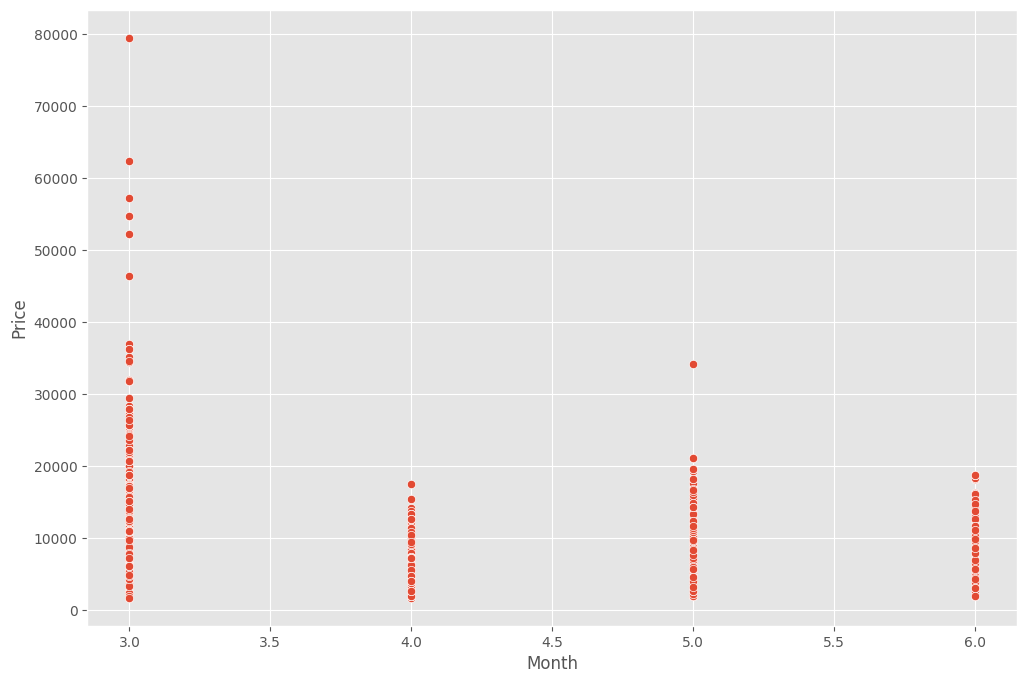

In [18]:
sns.scatterplot(x='Month', y='Price', data=df)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

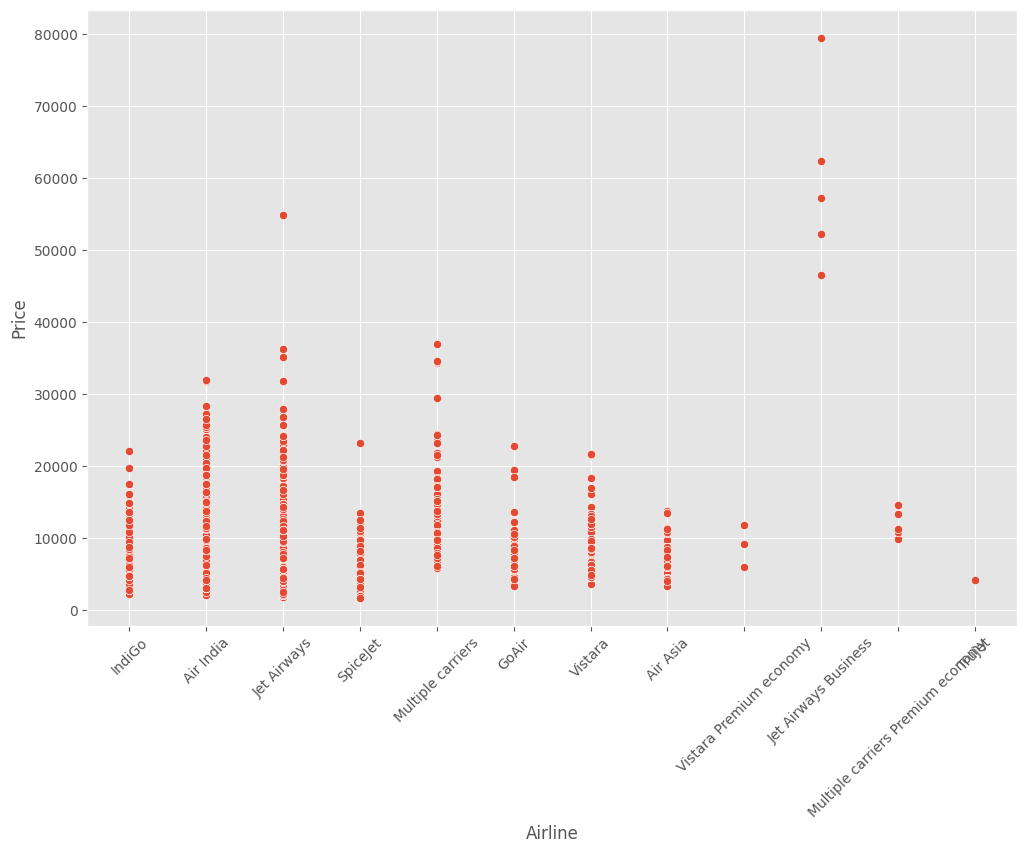

In [21]:
sns.scatterplot(x='Airline', y='Price', data=df)
plt.xticks(rotation=45)

<Axes: xlabel='Distance_km', ylabel='Price'>

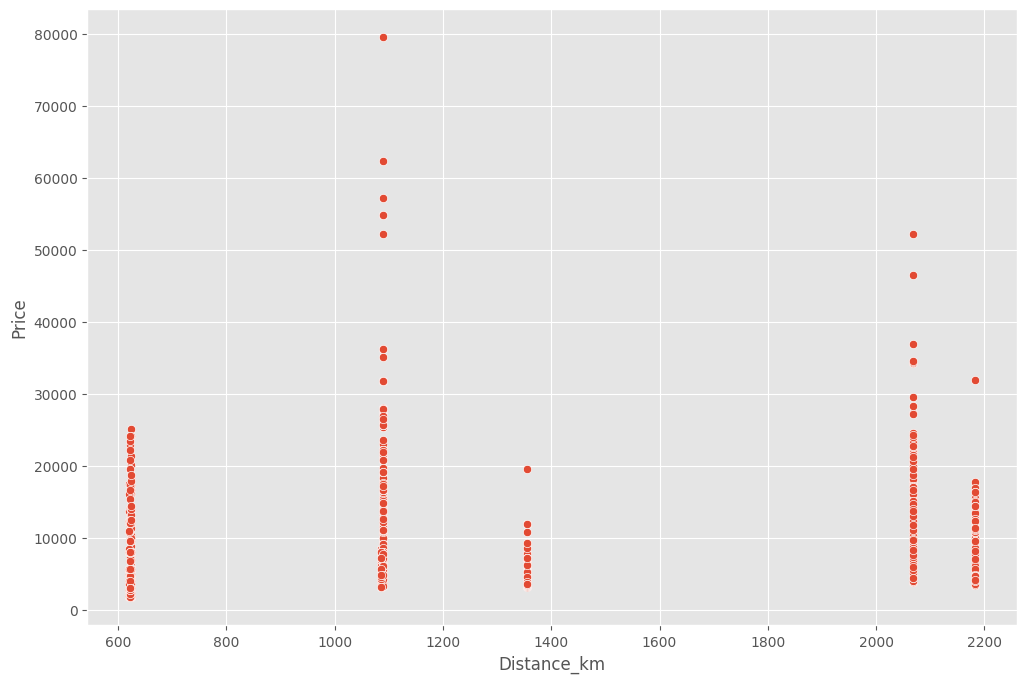

In [25]:
sns.scatterplot(x='Distance_km', y='Price', data=df)

<Axes: xlabel='Dep_hours', ylabel='Price'>

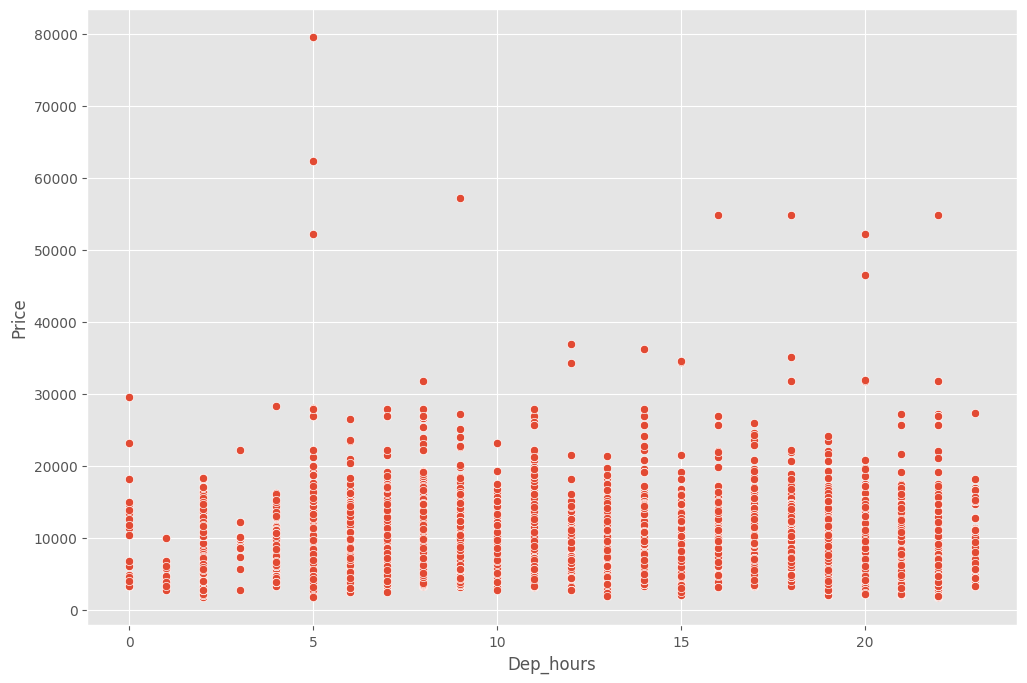

In [27]:
sns.scatterplot(x='Dep_hours', y='Price', data=df)

*   The dataset only gathers data from march to june.
*   Apparently there is not direct correlation between distance and price.
*   In that trimester, march is the most expensive month.
*   The time in wich flights are more expensive are after 3 in the afternoon, but are exceptions early in the morning.
*   The most important factor to price is the airline.







